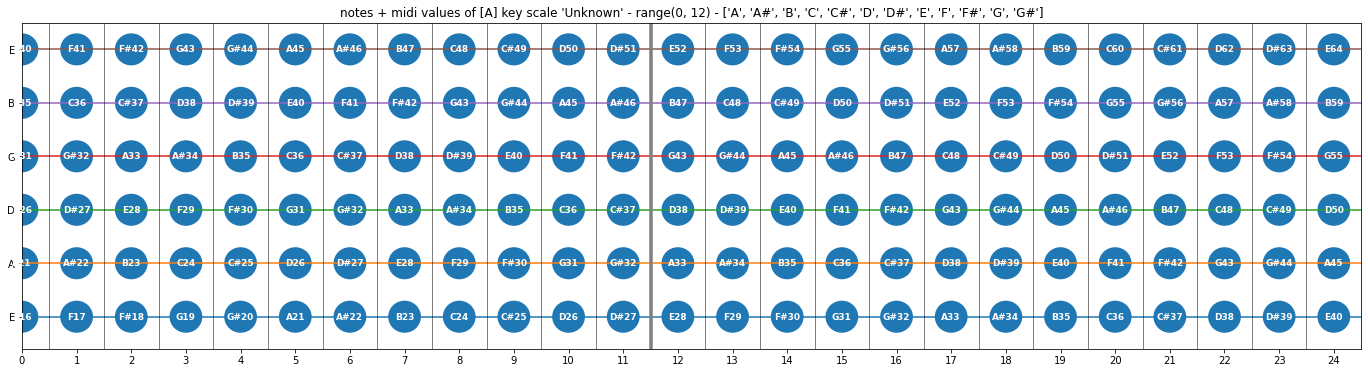

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

### VARS ###

FRETS=24  # init how many frets on guitar

whole_notes = ['C' , 'C#', 'D', 'D#', 'E', 'F', 'F#' , 'G', 'G#', 'A', 'A#', 'B']*3  # all the notes a few times just in case

# Now given some intervals
scales = { 
    "major" : [0, 2, 4, 5, 7, 9, 11],
    "minor" : [0, 2 , 3, 5, 7,8, 10,],
    "dorian" : [0,  2,  3,  5,  7,  9, 10],
    "phrygian" : [0, 1, 3, 5, 7, 8, 10 ],
    "minor_pentatonic" : [0, 3, 5, 7, 10],
    "major_pentatonic" : [0, 2, 4, 7, 9],
    "harmonic_minor" : [0, 2, 3, 5, 7, 8, 10,],
    "aeolian" : [0, 2, 3, 5, 7, 8, 10,],
    "minor_blues" : [0, 3, 5, 6, 7, 10],
    "locrian" : [0, 1, 3, 5, 6, 8, 10,],
    "lydian" :[0, 2, 4, 6, 7, 9, 11,],
}

# create guitar strings & their midi values
guitar_strings = []
for string, mval0 in zip([ "E", "A", "D", "G", "B", "E" ], [16,21,26,31,35,40]):
    firstnote = whole_notes.index(string)
    allnotes = whole_notes[firstnote:firstnote+FRETS+1]
    allmvalues = list(range(mval0,mval0+FRETS+1))
    #print(len(allnotes),len(allmvalues))
    guitar_strings.append({"note0":string,"allnotes":allnotes,"mvals":allmvalues})
    #for note, mval in zip(allnotes)

# also just this one is good
# Creating strings of guitar
start_strings = []
strings = {i:0 for i in 'EADGB'}
for i in strings.keys():
    start = whole_notes.index(i)
    strings[i] = whole_notes[start:start+FRETS+1]

# [ {"note0":"E", "allnotes": ["E","F",...],  "mvals": [16,17, ...]},
#   {"note0":"E", "allnotes": ["A","A#",...], "mvals": [21,22, ...]},
#   {"note0":"E", "allnotes": ["D","D#",...], "mvals": [26,27, ...]},
#   {"note0":"E", "allnotes": ["G","G#",...], "mvals": [31,32, ...]},
#   {"note0":"E", "allnotes": ["B","B#",...], "mvals": [35,36, ...]},
#   {"note0":"E", "allnotes": ["E","F",...],  "mvals": [40,41, ...]}
# ]

### FUNCS ###

def get_notes(key, intervals):
    """Given any key C, C#... B
       and intervals z.B Tone Tone Semitone"""
    root = whole_notes.index(key)
    octave = whole_notes[root:root+12]
    return [octave[i] for i in intervals]

def find_notes(scale):
    notes_strings = {i:0 for i in "EADGB"}
    # for every string 
    for key in strings.keys():
        # we create an empty list of indexes
        indexes = []
        for note in scale:
            # append index where note of the scale is found in
            ind = strings[key].index(note)
            indexes.append(ind)
            # because there are 20 frets, there are duplicate notes in the string
            ##if ind <= 7:
                # we must also append these to indexes
            ##    indexes.append(ind+12)
            indexes.append(ind+12)  # kostia fix for 24 FRETS
        indexes.sort()
        if indexes[0] == 0:         # kostia fix for 24 FRETS
            indexes.append(24)
        notes_strings[key] = indexes
    return notes_strings

def midiplot(key, intervals, night=True):
    org_key = key
    scale = get_notes(key, intervals)
    # Plot Strings
    fig, ax = plt.subplots(figsize=(FRETS,6))
    background = ['white', 'black']
    for i in range(1,7):
        ax.plot([i for a in range(FRETS+2)])
    # Plotting Frets
    for i in range(1,FRETS+1):
        if i == 12:
            ax.axvline(x=i, color='gray', linewidth=3.5)
            continue
        ax.axvline(x=i, color=background[night-1], linewidth=0.5)
    
    #ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    
    # setting height and width of displayed guitar
    ax.set_xlim([0.5, FRETS+1])
    ax.set_ylim([0.4, 6.5])
    ax.set_facecolor(background[night])
    to_plot = find_notes(scale)
    
    # ACHTUNG!!!
    #print(strings)

    stringletters = "".join([ i["note0"] for i in guitar_strings ])  # produced EADGBE

    for y_val, key in zip([1,2,3,4,5,6], stringletters):
        string_index = y_val - 1
        for i in to_plot[key]:
            font = 12
            x = i+0.5  # /figheight
            p = mpatches.Circle((x, y_val), 0.3)
            ax.add_patch(p)
            #print(f"key={key} - i={i}")
            # note = strings[key][i]
            letter_note = guitar_strings[string_index]["allnotes"][i]   # gets "E" for example
            midi_value  = guitar_strings[string_index]["mvals"][i]      # gets 16 for example
            note        = f"{letter_note}{midi_value}"                   # "E16"
            # if note is root make it a bit bigger
            if note == scale[0]:
                font=14.5
            ax.annotate(note, (i+0.5, y_val), color='w', weight='bold', 
                            fontsize=9, ha='center', va='center')
    
    # get name of scale
    scale_name="Unknown"
    for cur_scale,notes in scales.items():
        #print(f"{notes}=={intervals}")
        if notes==intervals:
            #print(f"true")
            scale_name=cur_scale

    

    plt.title(f'notes + midi values of [{org_key}] key scale \'{scale_name}\' - {intervals} - {scale}')
    # plt.yticks(np.arange(1,7), ['E', 'A', 'D', 'G', 'B', 'E'])
    plt.yticks(np.arange(1,7), [ i["note0"]+str(i["mvals"][0]) for i in guitar_strings ])
    plt.xticks(np.arange(FRETS+1)+0.5, np.arange(0,FRETS+1))
    # plt.savefig(f'Key {org_key} - {scale_name} Scale.png')
    plt.show()

### MAIN ###

# plot('G', scales['major'])
midiplot('A',range(12), False)  # plot all notes with their midi values


In [13]:
for i in guitar_strings:
    print(i["note0"] + str(i["mvals"][0]))
[ str(i["note0"])+str(i["mvals"][0]) for i in guitar_strings ]

E16
A21
D26
G31
B35
E40


['E16', 'A21', 'D26', 'G31', 'B35', 'E40']